# <b><span style='color:#F1A424'>AutoML - Regression - Bike Sharing Demand Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Bike Sharing Dataset**

**Features**:

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from [Web Link])
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
- `weathersit` :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users

**Target Variable**:

- `cnt`: count of total rental bikes including both casual and registered

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the count of total rental bikes including both casual and registered.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bike_sharing')

In [5]:
# Fetching in teradata dataframe
bike_df = DataFrame("bike_sharing")

In [6]:
# first 5 rows
bike_df.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
6,06-01-2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,07-01-2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
9,09-01-2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822
10,10-01-2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321
8,08-01-2011,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959
4,04-01-2011,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [7]:
# bike_df dataset
bike_df.shape

(731, 16)

In [8]:
bike_df.info()

<class 'teradataml.dataframe.dataframe.DataFrame'>
Data columns (total 16 columns):
instant                 int
dteday        datetime.date
season                  int
yr                      int
mnth                    int
holiday                 int
weekday                 int
workingday              int
weathersit              int
temp                  float
atemp                 float
hum                   float
windspeed             float
casual                  int
registered              int
cnt                     int
dtypes: int(11), datetime.date(1), float(4)


In [9]:
# Performing sampling to get 80% for trainning and 20% for testing
bike_df_sample = bike_df.sample(frac = [0.8, 0.2])

In [10]:
bike_df_sample.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,sampleid
3,11/01/03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1
5,11/01/05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600,1
6,11/01/06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606,1
7,11/01/07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,2
9,11/01/09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822,1
10,11/01/10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,1
8,11/01/08,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959,2
4,11/01/04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562,1
2,11/01/02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
1,11/01/01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1


In [11]:
# Fetching train and test data
bike_df_train= bike_df_sample[bike_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bike_df_test = bike_df_sample[bike_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [12]:
# train data shape
bike_df_train.shape

(585, 16)

In [13]:
# test data shape
bike_df_test.shape

(146, 16)

In [14]:
#train dataset
bike_df_train.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3,11/01/03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
5,11/01/05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
6,11/01/06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
9,11/01/09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822
11,11/01/11,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263
12,11/01/12,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627,25,1137,1162
10,11/01/10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321
4,11/01/04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
2,11/01/02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
1,11/01/01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [15]:
# test dataset
bike_df_test.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
18,11/01/18,1,0,1,0,2,1,2,0.216667,0.232333,0.861667,0.146775,9,674,683
29,11/01/29,1,0,1,0,6,0,1,0.196522,0.212126,0.651739,0.145365,123,975,1098
31,11/01/31,1,0,1,0,1,1,2,0.180833,0.18625,0.60375,0.187192,42,1459,1501
35,11/02/04,1,0,2,0,5,1,2,0.211304,0.228587,0.585217,0.127839,88,1620,1708
46,11/02/15,1,0,2,0,2,1,1,0.266087,0.254274,0.314348,0.291374,140,1675,1815
47,11/02/16,1,0,2,0,3,1,1,0.318261,0.3162,0.423478,0.251791,218,1897,2115
37,11/02/06,1,0,2,0,0,0,1,0.285833,0.291671,0.568333,0.1418,354,1269,1623
27,11/01/27,1,0,1,0,4,1,1,0.195,0.2197,0.6875,0.113837,15,416,431
8,11/01/08,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959
7,11/01/07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoML instance
# Using all models from model training.
# Keeping early stopping criteria max_models as 8
# and verbose level 2 for detailed loggging

aml = AutoML(max_models=8, 
             verbose=2)


Task type is set to Regression as target column is having distinct values greater than 20.


Feature Exploration started ...

Data Overview:
Total Rows in the data: 585
Total Columns in the data: 16
Identified Date Columns:


['dteday']


Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
casual,BIGINT,585,0,None,0,585,0,0.0,100.0
season,BIGINT,585,0,None,0,585,0,0.0,100.0
holiday,BIGINT,585,0,None,568,17,0,0.0,100.0
weathersit,BIGINT,585,0,None,0,585,0,0.0,100.0
workingday,BIGINT,585,0,None,186,399,0,0.0,100.0
instant,BIGINT,585,0,None,0,585,0,0.0,100.0
atemp,FLOAT,585,0,None,0,585,0,0.0,100.0
cnt,BIGINT,585,0,None,0,585,0,0.0,100.0
yr,BIGINT,585,0,None,287,298,0,0.0,100.0
windspeed,FLOAT,585,0,None,0,585,0,0.0,100.0



Statistics of Data:


func,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
std,208.881,1.097,0.5,3.415,0.168,2,0.466,0.54,0.181,0.161,0.141,0.077,693.077,1561.647,1937.537
25%,190,2,0,4,0,1,0,1,0.342,0.339,0.519,0.135,318,2553,3194
50%,372,3,1,7,0,3,1,1,0.511,0.494,0.628,0.182,745,3667,4586
75%,549,3,1,9,0,5,1,2,0.655,0.608,0.734,0.234,1139,4857,6034
max,731,4,1,12,1,6,1,3,0.849,0.826,0.973,0.422,3283,6946,8714
min,1,1,0,1,0,0,0,1,0.059,0.079,0,0.022,9,432,441
mean,368.679,2.504,0.509,6.499,0.029,3.002,0.682,1.398,0.497,0.476,0.628,0.19,867.009,3702.559,4569.568
count,585,585,585,585,585,585,585,585,585,585,585,585,585,585,585



Target Column Distribution:


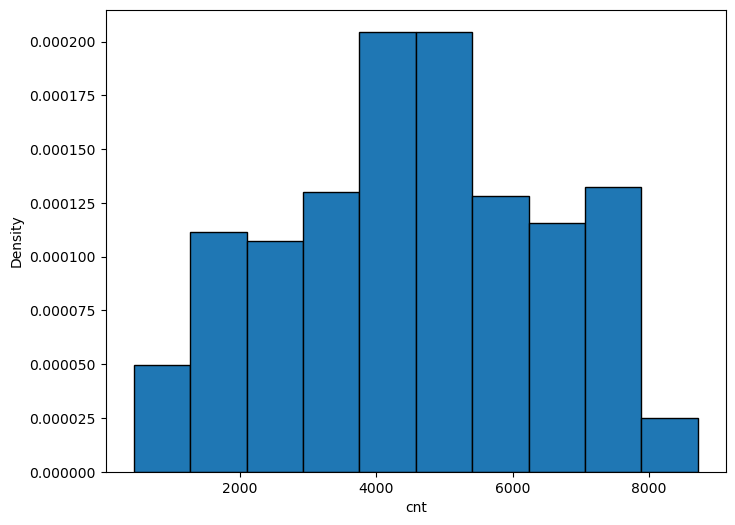

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    holiday           2.905983
1        hum           0.170940
2     casual           5.299145
3  windspeed           1.880342


Analysis completed. No action taken.                                                    


['dteday']


['dteday']
No useful date feature found                                                             


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


Analysis completed. No categorical columns were found.                                   


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,id
530,2,1,6,0,3,1,1,0.655833,0.611117,0.582083,0.343279,1173,6248,7421,9
40,1,0,2,0,3,1,2,0.134783,0.144283,0.494783,0.188839,53,1552,1605,10
631,3,1,9,0,6,0,1,0.65,0.610488,0.646667,0.283583,2512,5883,8395,18
38,1,0,2,0,1,1,1,0.271667,0.303658,0.738333,0.0454083,120,1592,1712,12
122,2,0,5,0,1,1,2,0.549167,0.532833,0.73,0.183454,847,3554,4401,11
591,3,1,8,0,1,1,1,0.720833,0.662254,0.545417,0.136212,1207,5676,6883,19
326,4,0,11,0,2,1,3,0.416667,0.421696,0.9625,0.118792,69,1538,1607,13
385,1,1,1,0,5,1,2,0.2175,0.220958,0.45,0.20275,115,3048,3163,21
570,3,1,7,0,1,1,1,0.741667,0.690017,0.694167,0.138683,1135,5831,6966,15
162,2,0,6,0,6,0,1,0.725,0.678038,0.654583,0.15485,1729,3237,4966,23


instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,id
120,2,0,4,0,6,0,1,0.4725,0.464021,0.503333,0.235075,1965,3347,5312,26
425,1,1,2,0,3,1,2,0.344348,0.34847,0.804783,0.179117,65,1769,1834,28
114,2,0,4,0,0,0,2,0.581667,0.551763,0.810833,0.192175,1710,2481,4191,124
427,1,1,3,0,5,1,2,0.353333,0.359842,0.657083,0.144904,246,2948,3194,31
387,1,1,1,0,0,0,2,0.1625,0.16225,0.79625,0.199638,196,1781,1977,27
665,4,1,10,0,5,1,2,0.545833,0.52275,0.807083,0.132467,1182,6262,7444,123
244,3,0,9,0,4,1,1,0.655,0.614921,0.639167,0.141796,783,4332,5115,30
400,1,1,2,0,6,0,2,0.264167,0.272725,0.779583,0.121896,384,2448,2832,126
509,2,1,5,0,3,1,2,0.621667,0.584612,0.774583,0.102,766,4494,5260,24
274,4,0,10,0,6,0,2,0.41,0.412863,0.75375,0.292296,480,1949,2429,120


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    holiday           2.905983
1        hum           0.170940
2     casual           5.299145
3  windspeed           1.880342


['holiday', 'casual', 'windspeed', 'hum']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259638724276"' - 7/19


instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,id
713,4,1,12,0,4,1,1,0.295833,0.294188,0.485833,0.174129,425,5107,5532,43
263,3,0,9,0,2,1,2,0.561667,0.532217,0.88125,0.134954,438,3203,3641,59
59,1,0,2,0,1,1,2,0.407273,0.400118,0.876364,0.289686,81,1365,1446,67
324,4,0,11,0,0,0,2,0.463333,0.457058,0.684583,0.18595,787,2733,3520,75
690,4,1,11,0,2,1,2,0.374167,0.380667,0.685,0.082725,534,5100,5634,91
566,3,1,7,0,4,1,1,0.77,0.714642,0.600417,0.165429,888,5703,6591,99
568,3,1,7,0,6,0,3,0.595833,0.549912,0.865417,0.2133,1264,3195,4459,83
19,1,0,1,0,3,1,2,0.292174,0.298422,0.741739,0.208317,78,1572,1650,51
591,3,1,8,0,1,1,1,0.720833,0.662254,0.545417,0.136212,1207,5676,6883,19
122,2,0,5,0,1,1,2,0.549167,0.532833,0.73,0.183454,847,3554,4401,11


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266344840217"' - 8/19
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719264909994814"'


['casual', 'registered']


['casual', 'registered']


id,cnt,casual,registered
10,1605,-1.3105292905321233,-1.362016190182233
12,1712,-1.183449454182702,-1.3370858123574931
13,1607,-1.2801818669262914,-1.3707418224208918
14,2134,-0.9729142029172431,-1.1432521247701424
16,5119,2.769302470476908,-0.5125135658042287
17,3348,0.21063531771020244,-0.7755290518552321
15,6966,0.7417152308122613,1.3049109776192933
11,4401,0.19546160590728648,-0.11425078005401242
9,7421,0.8137903618761122,1.5648101664422043
8,6398,0.9636307659299074,0.8779782573706265


id,cnt,casual,registered
513,6904,0.9769077637574589,1.1889847207342539
550,6978,3.5848894798836413,0.3781241819845961
31,3194,-0.9444634932867757,-0.4919460040988184
127,3510,0.07027848353322974,-0.6284398226892681
240,2792,0.6658466717976815,-1.2716435705675515
571,4672,0.870691781137047,-0.16722783293158422
212,6855,0.001996780420107882,1.4788003629468525
635,5047,0.04372448787812679,0.3382355774650126
521,5087,-0.7718625215286065,0.6311675169057037
631,6296,0.6165321084382046,0.9284622724657243


['casual', 'registered']


['r_casual', 'r_registered']


id,cnt,r_casual,r_registered
10,1605,-1.3105292905321233,-1.362016190182233
12,1712,-1.183449454182702,-1.3370858123574931
13,1607,-1.2801818669262914,-1.3707418224208918
14,2134,-0.9729142029172431,-1.1432521247701424
16,5119,2.769302470476908,-0.5125135658042287
17,3348,0.21063531771020244,-0.7755290518552321
15,6966,0.7417152308122613,1.3049109776192933
11,4401,0.19546160590728648,-0.11425078005401242
9,7421,0.8137903618761122,1.5648101664422043
8,6398,0.9636307659299074,0.8779782573706265


id,cnt,r_casual,r_registered
513,6904,0.9769077637574589,1.1889847207342539
550,6978,3.5848894798836413,0.3781241819845961
31,3194,-0.9444634932867757,-0.4919460040988184
127,3510,0.07027848353322974,-0.6284398226892681
240,2792,0.6658466717976815,-1.2716435705675515
571,4672,0.870691781137047,-0.16722783293158422
212,6855,0.001996780420107882,1.4788003629468525
635,5047,0.04372448787812679,0.3382355774650126
521,5087,-0.7718625215286065,0.6311675169057037
631,6296,0.6165321084382046,0.9284622724657243


['instant', 'season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']


id,cnt,holiday,instant,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
8,6398,0,0.5204170944795976,-0.45705773544862394,1.0466505562673123,-0.7362664661462585,1.0854379977349495,0.5579612484008015,-0.7493516035789746,-0.27123076275088404,-0.24755942337211215,-1.614920523914261,-0.4627132911092068,0.9636307659299074,0.8779782573706268
11,4401,0,-1.1122217302993311,-0.45705773544862394,-0.955428718794473,-0.44716748650125865,-1.0321182364427062,0.5579612484008015,1.078014587604841,0.30950228535043417,0.37266926682357393,0.7163829171512957,-0.06858496520482517,0.19546160590728648,-0.11425078005401246
19,6883,0,1.0944284392145525,0.45052833922792934,1.0466505562673123,0.4201294524337406,-1.0321182364427062,0.5579612484008015,-0.7493516035789746,1.2441129843985081,1.1672311803481066,-0.621394918505466,-0.7339678895651437,0.8782786370385051,1.2083057635484276
9,7421,0,0.807422766847075,-0.45705773544862394,1.0466505562673123,-0.1580685068562589,0.026659880646121636,0.5579612484008015,-0.7493516035789746,0.8902298890964404,0.8532828058810261,-0.35565559190339097,2.1824803132738144,0.8137903618761122,1.564810166442205
14,2134,0,-1.3992274026668086,-1.3646438101251772,-0.955428718794473,-1.0253654457912582,0.026659880646121636,0.5579612484008015,-0.7493516035789746,-0.8564989588273811,-0.9335529215794411,-1.315958345810961,1.6832388938403477,-0.9729142029172431,-1.1432521247701428
22,7109,0,1.3814341115820297,1.3581144139044825,1.0466505562673123,0.9983274117237402,1.6148270562793634,-1.7922391615298476,-0.7493516035789746,-0.5389133803926808,-0.4956631781673418,-0.9898177878800882,-0.594108179161309,2.8603447412944036,0.6978562775868826
13,1607,0,-0.15239948172612805,1.3581144139044825,-0.955428718794473,1.2874263913687398,-0.5027291778982923,0.5579612484008015,2.9053807787886567,-0.41187479353455053,-0.3096406162972177,2.4014424664608054,-0.9793209766985579,-1.2801818669262914,-1.3707418224208925
21,3163,0,0.12519616859651403,-1.3646438101251772,1.0466505562673123,-1.6035634050812577,1.0854379977349495,0.5579612484008015,1.078014587604841,-1.4962107080272735,-1.542043158366029,-1.3129361099741348,0.20319076208141823,-1.1929330240595246,-0.4296200595369694
15,6966,0,0.9956232077437814,0.45052833922792934,1.0466505562673123,0.13103047278874086,-1.0321182364427062,0.5579612484008015,-0.7493516035789746,1.3575406829757897,1.3376781897606562,0.45668081465491867,-0.6991649344384694,0.7417152308122613,1.304910977619294
23,4966,0,-0.9240212894026246,-0.45705773544862394,-0.955428718794473,-0.1580685068562589,1.6148270562793634,-1.7922391615298476,-0.7493516035789746,1.2667996129850272,1.264134814557943,0.16979308476301525,-0.4714598047205646,1.868363332178772,-0.31182402431507444


id,cnt,holiday,instant,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
26,5312,0,-1.1216317523441663,-0.45705773544862394,-0.955428718794473,-0.7362664661462585,1.6148270562793634,-1.7922391615298476,-0.7493516035789746,-0.10790010338069893,-0.04979226873441223,-0.9264015682824183,0.6584742604503969,2.315987830364793,-0.2432654852970403
27,1977,0,0.13460619064134935,-1.3646438101251772,1.0466505562673123,-1.6035634050812577,-1.5615072949871203,-1.7922391615298476,1.078014587604841,-1.7956502502059468,-1.9024726158667302,1.196534294105081,0.15935960208376118,-1.0392991920550005,-1.2192897771355988
123,7444,0,1.4425992548734594,1.3581144139044825,1.0466505562673123,0.9983274117237402,1.0854379977349495,0.5579612484008015,1.078014587604841,0.2913508047390945,0.310766115294318,1.2750471977509727,-0.7867145779299334,0.8308607876543926,1.573535798680864
30,5115,0,-0.5382103855643763,0.45052833922792934,-0.955428718794473,0.7092284320787404,0.5560489391905356,0.5579612484008015,-0.7493516035789746,0.8856947411212618,0.8766369255296717,0.058064577183852356,-0.6553196898778311,0.07407191148395874,0.37064506863717434
31,3194,0,0.32280663153805583,-1.3646438101251772,1.0466505562673123,-1.0253654457912582,1.0854379977349495,0.5579612484008015,1.078014587604841,-0.7566875928862611,-0.6893844955683287,0.18791200464806335,-0.6115448681320992,-0.9444634932867757,-0.4919460040988186
127,3510,0,1.3532040454475238,1.3581144139044825,1.0466505562673123,0.9983274117237402,-1.5615072949871203,-1.7922391615298476,1.078014587604841,-0.41641538586504173,-0.32120102831046676,0.5593498622915575,-0.664249302807945,0.07027848353322974,-0.6284398226892683
28,1834,0,0.3133966094932205,-1.3646438101251772,1.0466505562673123,-1.3144644254362579,0.026659880646121636,0.5579612484008015,1.078014587604841,-0.8056051253676316,-0.759201280175162,1.2583777914567285,-0.12966971485451625,-1.2877687228277495,-1.2267688904830207
124,4191,0,-1.1498618184786724,-0.45705773544862394,-0.955428718794473,-0.7362664661462585,-1.5615072949871203,-1.7922391615298476,1.078014587604841,0.48644383300146865,0.4888873228038198,1.3022255775785458,0.05424650855467574,1.8323257666468467,-0.7830081652026544
29,7570,0,1.3720240895371945,1.3581144139044825,1.0466505562673123,0.9983274117237402,0.5560489391905356,0.5579612484008015,-0.7493516035789746,-0.3120634275934304,-0.2514947521562293,-1.2163042864431943,-0.09475408322399181,0.17080432422754804,1.8689607759040292
125,5538,0,-0.7640509146404241,0.45052833922792934,-0.955428718794473,0.13103047278874086,1.0854379977349495,0.5579612484008015,-0.7493516035789746,0.9310625539389865,0.9346538631426309,-0.2892171364688949,-0.07733147881618295,1.0888138883039642,0.30084001072790323


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7']


response_column : cnt                                                                                                                                 
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.2, 0.3)
max_depth : (5, 4, 6, 7)
min_node_size : (1, 3, 4)
num_trees : (-1, 30, 40)
seed : 42
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : cnt
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.1, 0.2)
max_depth : (5, 4, 6, 7)
min_node_size : (1, 3, 4)
iter_num : (10, 30, 40)
seed : 42
Total number of models for xgboost : 3456
-----------------------------------------------------------------------------------------------------------------------

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260555111933"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261061523844"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262449734637"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262338492584"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260660206849"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265098662289"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261202918192"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260747653404"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260212507924"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261222622659"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261206356068"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261374172326"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261063490940"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261605896317"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266505046523"'


,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,GLM_1,rfe,0.386423,2.264876e-01,7.724585e-08,0.475907,0.000278,1.000000,1.000000
1,2,KNN_1,rfe,88.707166,3.443642e+04,1.519090e-03,185.570516,0.038976,0.988414,0.988210
2,3,DECISIONFOREST_0,lasso,298.648148,1.762768e+05,1.319662e-02,419.853267,0.114877,0.940690,0.939650
3,4,DECISIONFOREST_2,pca,566.318018,5.807889e+05,6.084368e-02,762.095051,0.246665,0.804589,0.790114
4,5,XGBOOST_2,pca,816.568373,9.408753e+05,6.548199e-02,969.987265,0.255894,0.683435,0.659986
5,6,DECISIONFOREST_1,rfe,928.776658,1.364854e+06,1.347478e-01,1168.269463,0.367080,0.540784,0.532728
6,7,XGBOOST_0,lasso,1019.532146,1.661624e+06,1.178348e-01,1289.039903,0.343271,0.440933,0.431125
7,8,XGBOOST_1,rfe,1135.675360,2.188197e+06,1.088479e-01,1479.255624,0.329921,0.263763,0.250847


In [17]:
# Fitting train data
aml.fit(bike_df_train, bike_df_train.cnt)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,GLM_1,rfe,0.386423,2.264876e-01,7.724585e-08,0.475907,0.000278,1.000000,1.000000
1,2,KNN_1,rfe,88.707166,3.443642e+04,1.519090e-03,185.570516,0.038976,0.988414,0.988210
2,3,DECISIONFOREST_0,lasso,298.648148,1.762768e+05,1.319662e-02,419.853267,0.114877,0.940690,0.939650
3,4,DECISIONFOREST_2,pca,566.318018,5.807889e+05,6.084368e-02,762.095051,0.246665,0.804589,0.790114
4,5,XGBOOST_2,pca,816.568373,9.408753e+05,6.548199e-02,969.987265,0.255894,0.683435,0.659986
5,6,DECISIONFOREST_1,rfe,928.776658,1.364854e+06,1.347478e-01,1168.269463,0.367080,0.540784,0.532728
6,7,XGBOOST_0,lasso,1019.532146,1.661624e+06,1.178348e-01,1289.039903,0.343271,0.440933,0.431125
7,8,XGBOOST_1,rfe,1135.675360,2.188197e+06,1.088479e-01,1479.255624,0.329921,0.263763,0.250847


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,GLM_1,rfe,0.386423,0.226488,7.724585e-08,0.475907,0.000278,1.0,1.0


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [22]:
# Generating prediction and metrics on test data
prediction = aml.predict(bike_df_test)

Data Transformation started ...


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261592479912"'⫾⫾⫾｜ 60% - 6/10


id,casual,registered,cnt
41,2090,4446,6536
89,603,3848,4451
52,1582,2971,4553
39,732,3916,4648
123,956,3110,4066
12,401,1676,2077
92,303,451,754
132,212,4373,4585
87,1448,3392,4840
118,954,5336,6290


id,cnt,casual,registered
87,4840,1.3353867051013486,-0.21521881024420808
92,754,-0.8363507966909994,-2.048224839808192
132,4585,-1.0089517684491685,0.3961987059075323
140,5217,2.1908047079907367,-0.26134000921997647
89,4451,-0.26733660408165055,0.06898749695782416
52,4553,1.589546377800191,-0.4776110368495931
123,4066,0.4022034292220166,-0.39097797390862277
12,2077,-0.6504728271052788,-1.28473201892554
39,4648,-0.022660501259630567,0.11136913925988161
45,4507,-0.15732719351050978,0.06774097806658719


id,casual,registered,cnt
41,2090,4446,6536
39,732,3916,4648
45,661,3846,4507
92,303,451,754
140,1899,3318,5217
73,922,6612,7534
123,956,3110,4066
12,401,1676,2077
87,1448,3392,4840
118,954,5336,6290


id,cnt,r_casual,r_registered
39,4648,-0.022660501259630567,0.11136913925988161
140,5217,2.1908047079907367,-0.26134000921997647
73,7534,0.3377151540596237,1.7916766046473354
41,6536,2.5530770772853555,0.4416966454376822
123,4066,0.4022034292220166,-0.39097797390862277
12,2077,-0.6504728271052788,-1.28473201892554
89,4451,-0.26733660408165055,0.06898749695782416
52,4553,1.589546377800191,-0.4776110368495931
87,4840,1.3353867051013486,-0.21521881024420808
118,6290,0.39841000127128756,0.99639755203814


id,cnt,holiday,instant,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
41,6536,0,1.5131744202097244,1.3581144139044825,1.0466505562673123,1.2874263913687398,1.6148270562793634,-1.7922391615298476,-0.7493516035789746,-0.5614149008985799,-0.4802902245395272,0.10323866824125476,-1.8383666420510947,2.5530770772853555,0.44169664543768244
140,5217,0,-0.3311899005779992,1.3581144139044825,-0.955428718794473,0.9983274117237402,1.6148270562793634,-1.7922391615298476,-0.7493516035789746,0.07829684830131264,0.16311454390895502,-1.071592097105289,0.9827713230937296,2.1908047079907367,-0.2613400092199766
73,7534,0,1.3955491446492827,1.3581144139044825,1.0466505562673123,0.9983274117237402,-0.5027291778982923,0.5579612484008015,-0.7493516035789746,-0.13076639569252477,-0.06956714239063914,-0.5280245005538342,-0.08624700718331554,0.3377151540596237,1.7916766046473362
39,4648,0,-0.8440361020215243,0.45052833922792934,-0.955428718794473,-0.1580685068562589,-0.5027291778982923,0.5579612484008015,-0.7493516035789746,1.3713312349819458,1.3535361527081984,0.022065907156237623,-0.6200519441727754,-0.022660501259630567,0.11136913925988165
87,4840,0,0.9203430313850989,0.45052833922792934,1.0466505562673123,0.13103047278874086,1.6148270562793634,-1.7922391615298476,-0.7493516035789746,2.0110429841818385,2.0429861097383943,-1.0078134991099186,-0.34821987863460735,1.3353867051013486,-0.21521881024420816
118,6290,0,0.9344580644523519,0.45052833922792934,1.0466505562673123,0.13103047278874086,-0.5027291778982923,0.5579612484008015,1.078014587604841,1.2439333206732013,1.1828619870319785,0.26340992002508345,-0.515826178111509,0.39841000127128756,0.9963975520381403
92,754,0,0.0028658820136548066,-1.3646438101251772,-0.955428718794473,1.5765253710137397,-1.5615072949871203,-1.7922391615298476,-0.7493516035789746,-1.1842491486302198,-1.179563155133822,0.3634263577905514,-0.4679386639752515,-0.8363507966909994,-2.048224839808193
132,4585,0,1.6872598280391777,1.3581144139044825,1.0466505562673123,1.5765253710137397,-1.0321182364427062,0.5579612484008015,1.078014587604841,-0.539093044117988,-0.4336311001100568,1.9999272018081309,-1.2679418413103787,-1.0089517684491685,0.39619870590753253
123,4066,0,0.3275116425604735,-1.3646438101251772,1.0466505562673123,-1.0253654457912582,1.6148270562793634,-1.7922391615298476,1.078014587604841,-0.4253060180900921,-0.3599587983793148,-0.0721524762460146,-0.38343128608773797,0.4022034292220166,-0.39097797390862293
12,2077,0,-1.309832193240873,-0.45705773544862394,-0.955428718794473,-1.0253654457912582,-1.0321182364427062,0.5579612484008015,1.078014587604841,-0.3371074620301921,-0.3832883605940497,0.7700149200110398,1.4151674066181736,-0.6504728271052788,-1.2847320189255405


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,cnt
0,89,0.821556,0.055396,1.117210,-1.900097,0.074222,-0.939811,1.837830,0.117316,4451
1,41,-2.458712,0.309808,-0.117249,3.581857,0.240398,1.923953,-0.564753,-0.204376,6536
2,87,-2.654989,-1.577049,1.114570,1.086330,0.528988,1.572815,0.971272,0.251477,4840
3,92,2.315677,0.637837,0.703393,2.120914,-0.098105,-1.362642,-1.159759,-0.856143,754
4,39,-0.814856,-0.680445,1.661551,-1.332813,-0.536367,-0.228039,-0.897909,-0.174927,4648
5,123,0.824000,-0.241630,-0.524714,1.230457,2.060245,1.915939,0.788343,0.569315,4066
6,140,-0.832872,-0.877354,1.802998,2.342112,-1.542682,1.210162,1.675642,0.190163,5217
7,52,0.460132,0.402415,2.818899,0.693587,2.259138,-0.816000,-0.242249,0.003923,4553
8,88,-1.200729,1.755962,-1.785574,0.500505,-0.500653,-1.657557,0.528771,0.612846,5499
9,118,-2.297509,0.479623,-0.208963,-0.889178,1.080054,-0.402100,-0.001193,0.781407,6290


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : GLM_1 
Feature Selection Method : rfe

Prediction : 
    id   prediction   cnt
0   89  4450.931093  4451
1   39  4647.922429  4648
2   45  4506.938625  4507
3  140  5217.269655  5217
4   41  6535.896420  6536
5   88  5498.491267  5499
6   92   755.087510   754
7  132  4584.700864  4585
8   87  4840.190581  4840
9  118  6289.450404  6290

Performance Metrics : 
        MAE       MSE      MSLE      MAPE       MPE      RMSE     RMSLE        ME   R2   EV      MPD       MGD
0  0.412747  0.269576  0.000018  0.056129 -0.050837  0.519207  0.004238  1.203267  1.0  1.0  0.00058  0.000019


In [23]:
# Printing prediction
prediction.head()

id,prediction,cnt
10,6456.5033411079785,6457
12,2077.669292428342,2077
13,4067.975020567437,4068
14,3830.9724137169997,3831
16,4602.020570161061,4602
17,7332.652426566931,7333
15,4791.909397685791,4792
11,3331.45615758296,3331
9,4794.787917585597,4795
8,2999.388006454831,2999


In [24]:
# Generating prediction and metrics on test data
prediction = aml.predict(bike_df_test, 3)

Data Transformation started ...


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260420782129"'⫾⫾⫾｜ 60% - 6/10


id,casual,registered,cnt
91,340,4975,5315
123,956,3110,4066
32,424,2320,2744
120,1639,3105,4744
89,603,3848,4451
158,1417,5317,6734
100,1619,2762,4381
55,699,3488,4187
147,841,3617,4458
159,662,3596,4258


id,cnt,casual,registered
59,3727,-1.0658531877101034,-0.11986011506457883
120,4744,1.6976590743959674,-0.3940942711367152
86,4972,-0.5063225649775771,0.4722363582729883
91,5315,-0.766172379602513,0.7714008921698644
147,4458,0.1840813220550995,-0.07498543498004744
159,4258,-0.1554304795351453,-0.08807388333803576
123,4066,0.4022034292220166,-0.39097797390862277
32,2744,-0.6068484056718954,-0.8833529359472312
100,4381,1.6597247948886775,-0.6078722609838579
55,4187,-0.08525206244665894,-0.15538590346483286


id,casual,registered,cnt
59,182,3545,3727
147,841,3617,4458
159,662,3596,4258
89,603,3848,4451
123,956,3110,4066
32,424,2320,2744
120,1639,3105,4744
86,477,4495,4972
91,340,4975,5315
77,309,2115,2424


id,cnt,r_casual,r_registered
147,4458,0.1840813220550995,-0.07498543498004744
91,5315,-0.766172379602513,0.7714008921698644
77,2424,-0.8249705128388124,-1.011121122299022
123,4066,0.4022034292220166,-0.39097797390862277
59,3727,-1.0658531877101034,-0.11986011506457883
8,2999,-0.47976856932247414,-0.7661801601709548
120,4744,1.6976590743959674,-0.3940942711367152
86,4972,-0.5063225649775771,0.4722363582729883
100,4381,1.6597247948886775,-0.6078722609838579
55,4187,-0.08525206244665894,-0.15538590346483286


id,cnt,holiday,instant,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
123,4066,0,0.3275116425604735,-1.3646438101251772,1.0466505562673123,-1.0253654457912582,1.6148270562793634,-1.7922391615298476,1.078014587604841,-0.4253060180900921,-0.3599587983793148,-0.0721524762460146,-0.38343128608773797,0.4022034292220166,-0.39097797390862293
120,4744,0,-0.8863812012232833,-0.45705773544862394,-0.955428718794473,-0.1580685068562589,-1.5615072949871203,-1.7922391615298476,1.078014587604841,1.1263352459266682,1.066214175958304,0.2576118656618678,-1.2158289582797455,1.6976590743959674,-0.39409427113671536
86,4972,0,0.8027177558246573,-0.45705773544862394,1.0466505562673123,-0.1580685068562589,-0.5027291778982923,0.5579612484008015,1.078014587604841,0.8764393370902844,0.7721389048830909,1.4650566868014996,0.36868437711113183,-0.5063225649775771,0.47223635827298854
89,4451,0,-1.1075167192769133,-0.45705773544862394,-0.955428718794473,-0.44716748650125865,-0.5027291778982923,0.5579612484008015,1.078014587604841,0.6771759326586586,0.6751370409376134,0.4779379314640581,2.1743253513076697,-0.26733660408165055,0.06898749695782419
147,4458,0,-0.7499358815731711,0.45052833922792934,-0.955428718794473,0.13103047278874086,-1.0321182364427062,0.5579612484008015,-0.7493516035789746,1.3849421232627948,1.4229109035046472,0.14527456237456746,0.3869943089867597,0.1840813220550995,-0.07498543498004746
159,4258,0,-0.7781659477076771,0.45052833922792934,-0.955428718794473,0.13103047278874086,-0.5027291778982923,0.5579612484008015,-0.7493516035789746,1.6435490005989215,1.6402441936103367,-0.5215016893952167,0.16868358277735013,-0.1554304795351453,-0.0880738833380358
100,4381,0,-0.2935498123986579,1.3581144139044825,-0.955428718794473,0.9983274117237402,-1.5615072949871203,-1.7922391615298476,-0.7493516035789746,-0.3844733532475457,-0.30593244377677037,0.7975556782363128,-1.251040365732876,1.6597247948886775,-0.6078722609838582
55,4187,0,-0.28884480137624025,1.3581144139044825,-0.955428718794473,0.9983274117237402,-1.0321182364427062,0.5579612484008015,-0.7493516035789746,-0.15798817225422232,-0.09228276875761789,1.0215055280155125,-0.9792083001947077,-0.08525206244665894,-0.15538590346483294
59,3727,0,-0.11005438252436908,1.3581144139044825,-0.955428718794473,1.5765253710137397,0.5560489391905356,0.5579612484008015,-0.7493516035789746,-0.9789969533550202,-1.0223955781082388,-0.7722675406042884,0.44896638610426975,-1.0658531877101034,-0.11986011506457889
8,2999,0,0.026390937125743117,-1.3646438101251772,-0.955428718794473,1.5765253710137397,1.0854379977349495,0.5579612484008015,-0.7493516035789746,-0.983352437604892,-0.9413560462044224,0.04018482704128653,-0.760897573985298,-0.47976856932247414,-0.7661801601709551


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,cnt
0,89,0.821556,0.055396,1.117210,-1.900097,0.074222,-0.939811,1.837830,0.117316,4451
1,91,-0.865323,-0.306696,-2.657509,0.934165,-2.647367,-0.783708,1.875190,0.310255,5315
2,147,-0.790934,-0.689591,1.787456,-1.307614,-0.620465,-1.055199,-0.123385,-0.390498,4458
3,59,0.501097,0.895778,-0.528733,0.612449,-2.934199,-0.069743,-0.083376,-0.196270,3727
4,120,-0.365622,-0.385433,3.016600,0.636251,1.847648,-0.634970,-0.715393,1.161655,4744
5,123,0.824000,-0.241630,-0.524714,1.230457,2.060245,1.915939,0.788343,0.569315,4066
6,100,-0.464539,0.464394,2.198406,2.533119,-0.002522,-1.053732,-1.371986,-0.456987,4381
7,158,-2.072707,-0.791889,-0.275474,-0.628217,1.164989,1.360847,-0.119952,-0.910881,6734
8,77,0.114312,0.586764,-1.345838,3.331772,-0.810501,-1.837612,-0.863674,0.254816,2424
9,159,-0.880621,-0.955583,1.697142,-1.456711,-0.985515,-0.539366,-0.159482,0.031618,4258


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : DECISIONFOREST_0 
Feature Selection Method : lasso

Prediction : 
    id   prediction  confidence_lower  confidence_upper   cnt
0   89  3802.843750       3802.843750       3802.843750  4451
1  100  4274.140000       4274.140000       4274.140000  4381
2   55  4274.140000       4274.140000       4274.140000  4187
3   59  3802.843750       3802.843750       3802.843750  3727
4  147  4274.140000       4274.140000       4274.140000  4458
5  159  4274.140000       4274.140000       4274.140000  4258
6  120  4274.140000       4274.140000       4274.140000  4744
7   86  4939.200000       4939.200000       4939.200000  4972
8  123  4274.140000       4274.140000       4274.140000  4066
9   32  2963.833333       2963.833333       2963.833333  2744

Performance Metrics : 
          MAE            MSE      MSLE       MAPE        MPE

In [25]:
# Printing prediction
prediction.head()

id,prediction,confidence_lower,confidence_upper,cnt
10,5968.5,5968.5,5968.5,6457
12,2842.0,2842.0,2842.0,2077
13,3802.84375,3802.84375,3802.84375,4068
14,3802.84375,3802.84375,3802.84375,3831
16,4274.14,4274.14,4274.14,4602
17,5968.5,5968.5,5968.5,7333
15,4274.14,4274.14,4274.14,4792
11,4274.14,4274.14,4274.14,3331
9,4939.2,4939.2,4939.2,4795
8,2963.8333333333335,2963.8333333333335,2963.8333333333335,2999


In [25]:
remove_context()

True